# Algoritmo Genético para Pousar Foguetes

Neste exercício, você vai implementar um algoritmo genético para treinar uma rede neural a pousar foguetes no ambiente LunarLander do Gymnasium.

## O que é um Algoritmo Genético?

Algoritmos genéticos são inspirados na evolução natural. A ideia é:
1. Criar uma **população** de soluções candidatas (cromossomos)
2. **Avaliar** a qualidade de cada solução (fitness)
3. **Selecionar** as melhores soluções
4. **Cruzar** (crossover) as melhores para criar novas soluções
5. **Mutar** algumas soluções aleatoriamente
6. Repetir até encontrar uma boa solução

### Conceitos Importantes

- **Genótipo**: A representação codificada da solução (o cromossomo - uma lista de números)
- **Fenótipo**: A solução em si (a rede neural funcionando)
- **Fitness**: Medida de qualidade da solução (quanto maior, melhor)
- **Cromossomo**: Lista de números que representa os parâmetros da solução
- **Gene**: Cada número individual no cromossomo

In [1]:
# Instalação das dependências
%%capture
!pip install swig
!pip install gymnasium[box2d]
!pip install renderlab

In [2]:
# Imports necessários
%%capture

import gymnasium as gym
import renderlab as rl
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
from IPython.display import clear_output

  if event.key is 'enter':



## Passo 1: Criando a Rede Neural

Nosso **fenótipo** será uma rede neural que controla o foguete. Ela terá:
- **8 entradas**: informações sobre o estado do foguete (posição, velocidade, ângulo, etc)
- **10 neurônios na camada escondida**: processam as informações
- **4 saídas**: as ações possíveis (não fazer nada, motor esquerdo, motor principal, motor direito)

### Entendendo o Reshape

O `reshape` é uma função do NumPy que reorganiza os elementos de um array em uma nova forma.

**Exemplos:**

In [3]:
# Exemplo 1: Array de 6 elementos transformado em matriz 2x3
arr = np.array([1, 2, 3, 4, 5, 6])
print("Array original:", arr)
print("Shape original:", arr.shape)  # (6,) - vetor com 6 elementos

matriz = arr.reshape((2, 3))  # 2 linhas, 3 colunas
print("\nMatriz 2x3:")
print(matriz)
print("Shape da matriz:", matriz.shape)  # (2, 3)

Array original: [1 2 3 4 5 6]
Shape original: (6,)

Matriz 2x3:
[[1 2 3]
 [4 5 6]]
Shape da matriz: (2, 3)


In [4]:
# Exemplo 2: Quando usar tupla com vírgula no final: (4,)
# Isso indica um vetor unidimensional com 4 elementos
arr2 = np.array([[1], [2], [3], [4]])  # Matriz 4x1
print("Matriz 4x1:")
print(arr2)
print("Shape:", arr2.shape)  # (4, 1) - matriz com 4 linhas e 1 coluna

vetor = arr2.reshape((4,))  # Vetor com 4 elementos
print("\nVetor com 4 elementos:")
print(vetor)
print("Shape:", vetor.shape)  # (4,) - vetor unidimensional

Matriz 4x1:
[[1]
 [2]
 [3]
 [4]]
Shape: (4, 1)

Vetor com 4 elementos:
[1 2 3 4]
Shape: (4,)


### Estrutura da Rede Neural

Nossa rede tem a arquitetura: **8 → 10 → 4**

Precisamos dos seguintes parâmetros:
- `w1`: pesos da primeira camada (10 neurônios × 8 entradas = 80 valores)
- `b1`: bias da primeira camada (10 valores)
- `w2`: pesos da segunda camada (4 saídas × 10 neurônios = 40 valores)
- `b2`: bias da segunda camada (4 valores)

**Total de parâmetros**: 80 + 10 + 40 + 4 = **134 genes no cromossomo**

### Sua Tarefa

Complete o método `__init__` da rede neural, transformando o cromossomo (lista de 134 números) nos parâmetros da rede usando `reshape`.

In [5]:
class Net():
    def __init__(self, chromosome):
        # Arquitetura: 8 => 10 => 4
        # Total de parâmetros: 80 + 10 + 40 + 4 = 134

        # ==================== PARA COMPLETAR ====================
        # Extraia os parâmetros do cromossomo e organize-os com reshape
        # w1: primeiros 80 valores, organizados em matriz (10, 8)
        self.w1 = np.array(chromosome[:80]).reshape((10, 8))

        # b1: próximos 10 valores, organizados em vetor (10,)
        self.b1 = np.array(chromosome[80:90]).reshape((10,))

        # w2: próximos 40 valores, organizados em matriz (4, 10)
        self.w2 = np.array(chromosome[90:130]).reshape((4, 10))

        # b2: últimos 4 valores, organizados em vetor (4,)
        self.b2 = np.array(chromosome[130:]).reshape((4,))
        # ==================== FIM DA PARTE DO ALUNO ====================

    def forward(self, x):
        """Executa a rede neural (já implementado)"""
        # Primeira camada: multiplicação matricial + bias + ReLU
        s1 = np.dot(self.w1, x) + self.b1
        z1 = s1 * (s1 > 0.0)  # ReLU: max(0, x)

        # Segunda camada: multiplicação matricial + bias + ReLU
        s2 = np.dot(self.w2, z1) + self.b2
        z2 = s2 * (s2 > 0.0)  # ReLU

        # Retorna o índice da saída com maior valor (a ação escolhida)
        return z2.argmax()

## Passo 2: Criando um Indivíduo Aleatório

Cada **indivíduo** é representado por um **cromossomo** (genótipo) que será depois transformado em uma rede neural (fenótipo).

### Por que retornar uma tupla (chromosome, None)?

Queremos que cada cromossomo esteja sempre acompanhado de sua **fitness** (desempenho). Mas quando criamos um cromossomo novo, ainda não testamos ele, então a fitness é `None`.

Mais tarde, quando testarmos o indivíduo, vamos substituir o `None` pelo valor da fitness.

**Estrutura**: `(cromossomo, fitness)` → `([gene1, gene2, ...], valor_fitness)`

### Sua Tarefa

Complete a função para:
1. Calcular quantos genes precisa (N)
2. Gerar um cromossomo com N genes aleatórios

In [6]:
def create_individual():
    """Cria o genótipo de um indivíduo completamente aleatório"""

    # ==================== PARA COMPLETAR ====================
    # Calcule o número total de genes necessários
    N = 134

    # Gere um cromossomo com N genes aleatórios
    # Use np.random.normal para distribuição normal de média zero
    # e desvio padrão igual a 10.
    chromosome = np.random.normal(0.0, 10.0, N)
    # ==================== FIM DA PARTE DO ALUNO ====================

    # Retorna tupla: (cromossomo, fitness)
    # fitness começa como None porque ainda não testamos
    return chromosome, None

## Passo 3: Criando uma População

Uma **população** é um conjunto de vários indivíduos (cromossomos).

Esta função está completa - ela simplesmente usa a função `create_individual()` que você criou anteriormente várias vezes.

In [7]:
def create_population(size):
    """Gera uma população inteira de indivíduos aleatórios"""

    # Cria uma lista vazia para armazenar a população
    population = list()

    # Para cada indivíduo que queremos na população
    for _ in range(size):
        # Cria um novo indivíduo e adiciona à população
        population.append(create_individual())

    return population

## Passo 4: Convertendo Genótipo em Fenótipo

Esta função transforma o **genótipo** (cromossomo - lista de números) no **fenótipo** (rede neural funcionando).

É simplesmente criar uma instância da classe `Net` que você implementou!

In [8]:
def get_phenotype(chromosome):
    """Gera o fenótipo (rede neural) a partir do genótipo (cromossomo)"""

    # Cria uma rede neural usando os genes do cromossomo
    # Essa rede é o "indivíduo" que vai jogar
    n = Net(chromosome)
    return n

## Passo 5: Avaliando a Fitness

A **fitness** mede o quão boa é uma solução. Quanto maior a fitness, melhor o indivíduo.

Neste caso, testamos a rede neural jogando o jogo LunarLander várias vezes e somamos os pontos que ela consegue.

Esta função já está completa pois envolve código específico do Gymnasium (biblioteca de ambientes de RL).

In [9]:
def fitness(n):
    """Calcula a fitness de uma rede neural jogando LunarLander"""

    R = 0.0  # Recompensa total acumulada
    trials = 6  # Número de jogos que vamos testar

    # Cria o ambiente do jogo
    env = gym.make('LunarLander-v3')

    # Testa a rede em vários jogos
    for _ in range(trials):
        # Reseta o ambiente e pega o estado inicial
        obs, _ = env.reset()

        # Joga até terminar
        while True:
            # A rede neural escolhe uma ação baseada no estado
            action = n.forward(obs)

            # Executa a ação no ambiente
            obs, reward, term, trunc, info = env.step(action)

            # Acumula a recompensa
            R += reward

            # Se o jogo terminou, sai do loop
            if term or trunc:
                break

    # Fecha o ambiente
    env.close()

    # Retorna a fitness normalizada
    # Adicionamos 10000 para garantir que seja sempre positivo
    # Dividimos pela média para normalizar
    return (10000.0 + R/trials) / 10000.0

## Passo 6: Crossover (Cruzamento)

O **crossover** é como fazer "filhos" de dois "pais". Pegamos parte dos genes de um pai e parte de outro.

### Como funciona o Crossover de 2 Pontos:

```
Pai 1:  [1, 2, 3, 4, 5, 6, 7, 8]
Pai 2:  [A, B, C, D, E, F, G, H]
        ↓        ↓     ↓
       idx1=2  idx2=5

Filho 1: [1, 2, C, D, E, 6, 7, 8]  <- Pai1 + Pai2(meio) + Pai1
Filho 2: [A, B, 3, 4, 5, F, G, H]  <- Pai2 + Pai1(meio) + Pai2
```

### Sua Tarefa

Complete a função de crossover, criando os dois filhos combinando material genético dos pais.

In [10]:
def crossover2point(chr1, chr2):
    """Combina genes de dois indivíduos, gerando dois novos cromossomos"""

    # Pega o tamanho do cromossomo
    N = len(chr1)

    # ==================== PARA COMPLETAR ====================
    # Escolhe dois pontos aleatórios para o crossover
    # Use np.random.randint(início, fim) para gerar números aleatórios
    idx1 = np.random.randint(0, N)
    idx2 = np.random.randint(0, N)
    # ==================== FIM DA PARTE DO ALUNO ====================

    # Garante que idx1 vem antes de idx2
    if idx1 > idx2:
        idx1, idx2 = idx2, idx1

    # ==================== PARA COMPLETAR ====================
    # Cria os dois filhos combinando partes dos pais
    # Use np.concatenate para juntar arrays
    # Filho 1: início do pai1 + meio do pai2 + fim do pai1
    new_chr1 = np.concatenate((chr1[:idx1], chr2[idx1:idx2], chr1[idx2:]))

    # Filho 2: início do pai2 + meio do pai1 + fim do pai2
    new_chr2 = np.concatenate((chr2[:idx1], chr1[idx1:idx2], chr2[idx2:]))
    # ==================== FIM DA PARTE DO ALUNO ====================

    return new_chr1, new_chr2

## Passo 7: Mutação

A **mutação** adiciona aleatoriedade, mudando alguns genes aleatoriamente.

Isso é importante para:
- Explorar novas soluções que não existem na população atual
- Evitar que a população fique "presa" em uma solução local
- Manter a **diversidade genética**

### Como funciona:

Com uma probabilidade `p` (ex: 3%), alguns genes são escolhidos aleatoriamente e:
- 50% de chance: adicionamos um pequeno ruído ao gene
- 50% de chance: substituímos completamente por um valor aleatório

### Sua Tarefa

Complete a função de mutação.

In [11]:
def mutation(chr, p):
    """Aplica mutação em alguns genes do cromossomo"""

    # Pega o tamanho do cromossomo
    N = len(chr)

    # ==================== PARA COMPLETAR ====================
    # Calcula quantos genes vamos mutar (aproximadamente p*N genes)
    # Usamos distribuição normal para ter variação
    total = np.random.normal(p*N, p*N)

    # Garante que total está entre 0 e N
    if total < 0:
        total = 0
    elif total > N:
        total = N
    # ==================== FIM DA PARTE DO ALUNO ====================

    # Para cada gene que vamos mutar
    for _ in range(int(total)):
        # ==================== PARA COMPLETAR ====================
        # Escolhe um índice aleatório para mutar
        idx = np.random.randint(0, N)

        # Com 50% de chance, adiciona ruído; senão, gera novo valor
        # para o gene chr[idx]

        # SEU CÓDIGO AQUI

        if np.random.rand() < 0.5:
            # Adiciona ruído (pequena mudança)
            chr[idx] += np.random.normal(0.0, 1.0)
        else:
            # Substitui por novo valor aleatório (mudança maior)
            chr[idx] = np.random.normal(0.0, 10.0)

        # ==================== FIM DA PARTE DO ALUNO ====================

    return chr

## Passo 8: Calculando Fitness da População

Esta função testa todos os indivíduos da população e ordena do melhor para o pior.

Já está implementada - ela usa as funções que você criou anteriormente.

In [12]:
def compute_fitness(population):
    """Avalia cada indivíduo e adiciona seu score"""

    scored = list()

    # Para cada indivíduo (cromossomo, score) na população
    for chromosome, score in population:
        # Converte cromossomo em rede neural
        n = get_phenotype(chromosome)

        # Calcula a fitness testando a rede
        score = fitness(n)

        # Adiciona à lista com o score atualizado
        scored.append((chromosome, score))

    # Ordena do melhor (maior fitness) para o pior
    # key=lambda x:x[1] significa "ordena pelo segundo elemento da tupla" (a fitness)
    # reverse=True significa ordem decrescente (maior primeiro)
    scored.sort(key=lambda x:x[1], reverse=True)

    return scored

## Passo 9: Seleção por Roleta

A **seleção por roleta** é um método para escolher pais para reprodução.

### Como funciona:

Imagine uma roleta onde cada indivíduo tem uma fatia. O tamanho da fatia é proporcional à sua fitness. Fatia grande dá mais chance de ser escolhido. Fatia menor dá menos chance.
```

### Algoritmo:

1. Calcular a fitness exponencial de cada um (para amplificar diferenças)
2. Normalizar (dividir pelo total)
3. Sortear um número aleatório entre 0 e 1
4. Acumular as probabilidades até passar do número sorteado

### Sua Tarefa

Complete a função de seleção por roleta.

In [13]:
def roulette(population):
    """Seleciona um indivíduo usando o método da roleta"""

    # ==================== PARA COMPLETAR ====================
    # Cria array com as fitness exponenciais
    # np.exp amplifica as diferenças entre fitness
    fitnesses = np.array([x[1] for x in population])
    fitnesses = np.exp(fitnesses)

    # Calcula o total das fitness
    total = np.sum(fitnesses)

    # Normaliza (divide cada fitness pelo total)
    # Agora a soma de todas é 1.0
    fitnesses /= total

    # Sorteia um número aleatório entre 0 e 1
    choice = np.random.rand()
    # ==================== FIM DA PARTE DO ALUNO ====================

    # Acumula as probabilidades até passar do número sorteado
    subtotal = 0
    idx = 0

    # ==================== PARA COMPLETAR ====================
    # Para cada fitness na lista
    for fit in fitnesses:
        # Acumula a probabilidade
        subtotal += fit
        # Se passou do número sorteado OU chegou no último, retorna este índice
        if subtotal >= choice or idx == len(fitnesses)-1:
            return idx
        # Senão, continua para o próximo
        idx += 1
    # ==================== FIM DA PARTE DO ALUNO ====================

    return idx

## Passo 10: Gerando Nova Geração

Esta função cria uma nova geração de indivíduos através de:
1. Seleção dos pais (usando roleta)
2. Crossover dos pais
3. Mutação dos filhos

Já está implementada - ela usa todas as funções que você criou!

In [14]:
def new_generation(population, size, mutation_rate):
    """Gera uma nova população através de seleção, crossover e mutação"""

    new_population = list()

    # Continua até ter indivíduos suficientes
    while len(new_population) < size:
        # Seleciona dois pais usando roleta
        idx1 = roulette(population)
        idx2 = roulette(population)

        # Se escolheu o mesmo duas vezes, tenta novamente
        if idx1 == idx2:
            continue

        # Pega os cromossomos dos pais (descarta a fitness)
        chr1, _ = population[idx1]
        chr2, _ = population[idx2]

        # Faz crossover dos pais, gerando dois filhos
        new_chr1, new_chr2 = crossover2point(chr1, chr2)

        # Aplica mutação nos filhos
        new_chr1 = mutation(new_chr1, mutation_rate)
        new_chr2 = mutation(new_chr2, mutation_rate)

        # Adiciona os filhos à nova população
        # fitness = None pois ainda não testamos os filhos
        new_population.append((new_chr1, None))
        new_population.append((new_chr2, None))

    # Retorna exatamente 'size' indivíduos (pode ter gerado um a mais)
    return new_population[:size]

## Passo 11: Algoritmo Genético Completo

Esta é a função principal que junta tudo!

### Parâmetros:
- `pop_size`: tamanho da população
- `elite_size`: quantos melhores preservar (elitismo)
- `epochs`: número de gerações
- `mutation_rate`: taxa de mutação (0.01 = 1%)

### O que faz:
1. Cria população inicial aleatória
2. Para cada geração:
   - Avalia fitness de todos
   - Mostra o melhor (e gera vídeo a cada 5 gerações)
   - Preserva os elite_size melhores
   - Gera nova população do resto

Esta função está completa e bem comentada.

In [15]:
def genalg(pop_size, elite_size, epochs, mutation_rate):
    """Executa o algoritmo genético completo"""

    # Listas para guardar estatísticas
    x = list()  # Número da geração
    y = list()  # Melhor fitness de cada geração

    # Cria a população inicial aleatória
    population = create_population(pop_size)

    # Para cada geração
    for generation in range(epochs+1):

        # Avalia a fitness de todos os indivíduos e ordena
        population = compute_fitness(population)

        # Pega o melhor indivíduo (primeiro da lista ordenada)
        chr, fit = population[0]
        _, worst = population[-1]  # E o pior (último)

        # Converte o melhor cromossomo em rede neural
        n = get_phenotype(chr)

        # Guarda estatísticas para o gráfico
        y.append(fit)
        x.append(generation)

        # A cada 5 gerações, mostra um vídeo do melhor jogando
        if generation % 5 == 0:
            R = 0.0

            # Cria ambiente com renderização
            env1 = gym.make('LunarLander-v3', render_mode='rgb_array')
            env2 = rl.RenderFrame(env1, './output')

            # Joga uma partida gravando
            obs, _ = env2.reset()
            while True:
                action = n.forward(obs)
                obs, reward, term, trunc, info = env2.step(action)
                R += reward
                if term or trunc:
                    break

            # Limpa a tela e mostra informações
            clear_output()
            print(f'Geração {generation}, melhor: {fit:.4f}, pior: {worst:.4f}')

            # Mostra o vídeo
            env2.play()

            # Plota o gráfico de evolução
            plt.plot(x, y)
            plt.xlabel('Geração')
            plt.ylabel('Melhor Fitness')
            plt.title('Evolução do Algoritmo Genético')
            plt.grid(True)
            plt.show()

        # Elitismo: separa os melhores para preservar
        elite = population[:elite_size]

        # Gera nova população (sem os elite, que já estão garantidos)
        population = new_generation(population, pop_size - elite_size, mutation_rate) + elite

    return n, x, y

## Executando o Algoritmo Genético

Agora vamos executar tudo!

### Parâmetros escolhidos:
- **População**: 50 indivíduos
- **Elite**: 3 melhores são preservados
- **Gerações**: 1000
- **Mutação**: 3%

**Atenção**: Isso vai demorar! Cada geração precisa testar 50 redes neurais jogando 6 vezes cada.

Você verá:
- Um vídeo a cada 5 gerações mostrando o melhor indivíduo jogando
- Um gráfico da evolução da fitness ao longo das gerações
- A mensagem com a melhor e pior fitness da geração atual

Geração 1000, melhor: 1.0266, pior: 0.8919
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


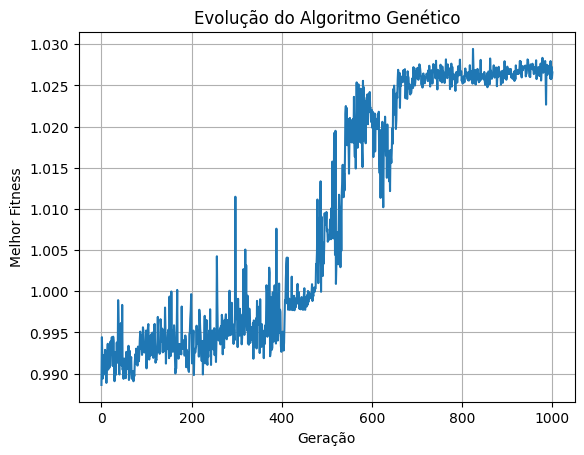

In [16]:
# Executa o algoritmo genético
best_network, generations, fitnesses = genalg(
    pop_size=50,        # Tamanho da população
    elite_size=3,       # Quantos melhores preservar
    epochs=1000,        # Número de gerações
    mutation_rate=0.03  # Taxa de mutação (3%)
)